In [12]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

import tf_lab.point_clouds.in_out as pio
from tf_lab.point_clouds.in_out import PointCloudDataSet

from tf_lab.point_clouds.point_net_ae import PointNetAutoEncoder
from tf_lab.point_clouds.point_net_ae import Configuration as PN_Conf

# import tf_lab.point_clouds.various_encoders_decoders as enc_dec
# import tf_lab.models.point_net_based_AE as pnAE

from general_tools.in_out import create_dir
# from geo_tool import Point_Cloud

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

seed = 42
np.random.seed(seed)
tf.set_random_seed(seed)

In [14]:
data_path = '/Users/optas/DATA/Point_Clouds/Shape_Net_Core/from_manifold_meshes/1024/03001627'
# LOG_PATH = '/Users/optas/DATA/Neural_Nets/Train_Log/Point_Cloud_AE/'
# create_dir(LOG_PATH)

model_path = '/Users/optas/DATA/Neural_Nets/Models/Point_Cloud_AE/'
experiment_name = 'test_ae'

model_path = osp.join(model_path, experiment_name)
create_dir(model_path)

'/Users/optas/DATA/Neural_Nets/Models/Point_Cloud_AE/test_ae'

In [10]:
file_names = pio.load_filenames_of_input_data(data_path)
file_names = file_names[:1000]
all_pclouds, model_names = pio.load_crude_point_clouds(file_names=file_names, n_threads=11)


train_data, val_data, test_data = pio.train_validate_test_split(all_pclouds, 
                                                            train_perc=0.8, 
                                                            validate_perc=0.1, 
                                                            test_perc=0.1, 
                                                            seed=seed)

train_data = PointCloudDataSet(train_data)
val_data = PointCloudDataSet(val_data)
test_data = PointCloudDataSet(test_data)

6778 files containing  point clouds were found.


In [20]:
def reset_graph():
    if 'sess' in globals() and sess:
        sess.close()
    tf.reset_default_graph()

reset_graph()

conf = PN_Conf(n_input = [1024, 3],
               training_epochs = 120,
               batch_size = 40,
               loss = 'l2',
               train_dir = model_path,
               loss_display_step = 1,               
               saver_step = 5,
               saver_max_to_keep = 200,
               learning_rate = 0.0002               
              )

ae = PointNetAutoEncoder(experiment_name, conf)

In [21]:
ae.restore_model(model_path, 50)

Model restored in epoch 50.


In [33]:
# [v.name for v in ae.graph.get_collection('variables')]
op = ae.graph.get_operation_by_name('test_ae/epoch')
print op.run(session=ae.sess)

None


In [71]:
# from autopredictors.tf_experiments.evaluate.basics import generalization_error
# from autopredictors.tf_experiments.plotting.basics import plot_train_val_test_curves, plot_reconstructions_at_epoch
# gen_error, best_epoch, stats = generalization_error(ae, train_data, test_data, val_data, conf)

# SAVEDIR = '/Users/optas/Desktop/lala/'
# np.savetxt(osp.join(SAVEDIR, 'error-stats.numpy'), stats)

In [82]:
file_names = pio.load_filenames_of_input_data('/Users/optas/DATA/Point_Clouds/Shape_Net_Core/from_manifold_meshes/1024/')
# from general_tools.in_out.basics import files_in_subdirs
# for f in files_in_subdirs(DATA_PATH, '._pts.txt$'):
#     print f

6778 files containing  point clouds were found.


In [76]:
/Users/optas/DATA/Point_Clouds/Shape_Net_Core/from_manifold_meshes/1024/03001627/



'/Users/optas/DATA/Point_Clouds/Shape_Net_Core/from_manifold_meshes/1024/03001627'

In [8]:
ae.restore_model(conf.train_dir, 50)
r, l, o = ae.evaluate(train_data, conf)
print l


# a = [v for v in tf.global_variables() if v.name=='our_ap/epoch:0']
# a[0].eval(ae.sess)

0.0144700943958


In [27]:
import glob
files = glob.glob(osp.join(conf.train_dir, 'models.ckpt-*.index'))
epochs_saved = []
for f in files:
    epochs_saved.append(int(osp.basename(f)[len('models.ckpt-'):-len('.index')]))
    epochs_saved.sort()

for epoch in epochs_saved:
    ae.restore_model(conf.train_dir, epoch)
    _, l, _ = ae.evaluate(test_data, conf)
    print epoch, l

    



0.0155312293209
0.0151481349021
0.0148746860214
0.0139837288298
0.0148148634471
0.0151991788298
0.0148291303776
0.0156111437827
0.0149112157524
0.0153016629629


In [ ]:
save_dir = '/Users/optas/Desktop/lala'
counter = 0
plt.ioff()
for op, rp in zip(o, r):
    for oi, ri in zip(op, rp):
        counter += 1
        fig = Point_Cloud(points=oi).plot(show=False);
        fig.savefig(osp.join(save_dir, '%d_original.png' % (counter, ) ))
        plt.close()
        
        fig = Point_Cloud(points=ri).plot(show=False);    
        fig.savefig(osp.join(save_dir, '%d_reconstructed.png' % (counter, ) ))
        plt.close()

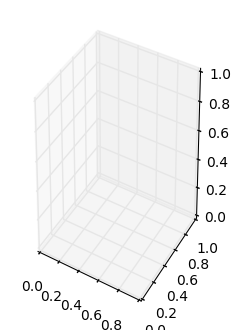